In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_data.shape

(42000, 785)

In [4]:
test_data.shape

(28000, 784)

In [5]:
train_images = train_data.drop("label", axis=1)
train_labels = train_data["label"]

In [6]:
train_images.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
train_labels.to_numpy()

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
test_data.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
train_images = train_images / 255


test_data=test_data / 255

In [10]:

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
history=network.fit(train_images, train_labels,epochs=5,batch_size=128)

Epoch 1/5
329/329 [==============================] - 2s 7ms/step - loss: 0.2971 - accuracy: 0.9145
Epoch 2/5
329/329 [==============================] - 2s 7ms/step - loss: 0.1224 - accuracy: 0.9645
Epoch 3/5
329/329 [==============================] - 2s 7ms/step - loss: 0.0801 - accuracy: 0.9759
Epoch 4/5
329/329 [==============================] - 2s 7ms/step - loss: 0.0582 - accuracy: 0.9824
Epoch 5/5
329/329 [==============================] - 2s 7ms/step - loss: 0.0427 - accuracy: 0.9872


KeyError: 'val_accuracy'

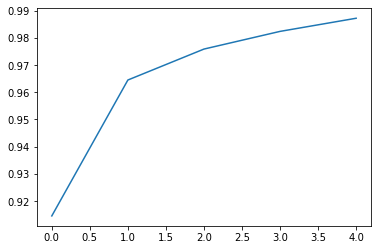

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
submit = pd.DataFrame(np.argmax(network.predict(test_data), axis=1), 
                      columns=['Label'], 
                      index=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')['ImageId'])
submit.index.name = 'ImageId'
submit.to_csv('submittion.csv',index=False)

In [ ]:
submit